# Importing libraries and packages

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from itertools import zip_longest
import math
import pandas as pd
import patsy
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn import metrics

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet,LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

* define the lists

In [2]:
pages_url=[]

prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views=[], [], [], [], [], [], [], [], []

# Web scarping Aqar website

In [3]:
#for i in range(1,1000):
 #   url ="https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/%D8%BA%D8%B1%D8%A8-%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/"+str(i)
  #  response=requests.get(url)
   # page=response.text
   # soup=BeautifulSoup(page, "html")
#-------------------------------------------------------    
 #   for el in soup.find_all('a', {'class':"listTitle"}):
  #      pages_url.append(el["href"])

In [4]:
# function to extract the information from the pages url's
#def collect_aqar_data():
 #   
  #  for n in pages_url:
   #     response=requests.get('https://sa.aqar.fm'+n)
    #    page=response.text
     #   soup=BeautifulSoup(page, "html.parser")
#-------------------------------------------------------        
 #       if soup.find("span", class_="listingPagePrice") is None :
  #          prices.append(np.nan)
   #     else:
    #        prices.append(soup.find("span", class_="listingPagePrice").find("span").findNext().text) 
#-------------------------------------------------------
 #       if soup.find(text="المساحة") is None:
  #          areas.append(np.nan)
   #     else:
    #        areas.append(soup.find(text="المساحة").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------       
    #    if soup.find(text="الواجهة") is None:
     #       direction.append(np.nan)
      #  else:
       #     direction.append(soup.find(text="الواجهة").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------            
  #      if soup.find(text="غرف النوم") is None:
   #         bedroom.append(np.nan)
    #    else:
     #       bedroom.append(soup.find(text="غرف النوم").find_previous().find_previous().find_previous().text)    
#-------------------------------------------------------        
   #     if soup.find(text="دورات مياه") is None:
    #        bathroom.append(np.nan)
     #   else:
      #      bathroom.append(soup.find(text="دورات مياه").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------        
  #      if soup.find(text="الصالات") is None :
   #         living_room.append(np.nan)
    #    else:
     #       living_room.append(soup.find(text="الصالات").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------        
  #      if soup.find(text="عرض الشارع") is None:
   #         street_width.append(np.nan)
    #    else:
     #       street_width.append(soup.find(text="عرض الشارع").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------        
  #      if soup.find(text="عمر العقار") is None:
   #         House_age.append(np.nan)
    #    else:
     #       House_age.append(soup.find(text="عمر العقار").find_previous().find_previous().find_previous().text)
#-------------------------------------------------------       
   #     if soup.find("table", class_="dc-listingInfoTable") is None:
    #        views.append(np.nan)
     #   else:
      #      views.append(soup.find("table", class_="dc-listingInfoTable").find("span").text) 

In [5]:
#collect_aqar_data()

* Convert to dataframe

In [6]:
#df=pd.DataFrame(list(zip(prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views)),
                      #columns=["price","area","direction","bedroom","bathroom","living_room","street_width","house_age","views"]) 

* save data

In [7]:
#file=[prices,areas,direction,bedroom,bathroom,living_room,street_width,House_age,views]
#a=zip_longest(*file)
#with open("/Users/saeed/Desktop/Aqar project/aqar_1.csv","w") as myfile:
 #   wr=csv.writer(myfile)
  #  wr.writerow(["price","area","direction","bedroom","bathroom","living_room","street_width","house_age","views"])
   # wr.writerows(a)

In [8]:
df = pd.read_csv('data/aqar1.csv')

In [9]:
df

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,"1,200,000",375 م²,شمال,4.0,4.0,1.0,15 م,جديد,157.0
1,"1,400,000",312 م²,جنوب شرقي,5.0,5.0,3.0,20 م,NaN,11507.0
2,"1,050,000",360 م²,شرق,3.0,4.0,2.0,15 م,2 سنة,1420.0
3,"1,500,000",300 م²,جنوب,6.0,5.0,3.0,15 م,جديد,842.0
4,"1,000,000",360 م²,شرق,5.0,5.0,1.0,15 م,2 سنة,291.0
...,...,...,...,...,...,...,...,...,...
17958,"1,600,000",450 م²,جنوب,7.0,3.0,2.0,15 م,5 سنة,243.0
17959,"1,350,000",375 م²,شمال,5.0,5.0,3.0,20 م,جديد,34.0
17960,"950,000",235 م²,جنوب شرقي,5.0,5.0,5.0,20 م,جديد,935.0
17961,"1,130,000",300 م²,شرق,4.0,4.0,2.0,15 م,NaN,90.0


# EDA

In [10]:
df.head()

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,"1,200,000",375 م²,شمال,4.0,4.0,1.0,15 م,جديد,157.0
1,"1,400,000",312 م²,جنوب شرقي,5.0,5.0,3.0,20 م,NaN,11507.0
2,"1,050,000",360 م²,شرق,3.0,4.0,2.0,15 م,2 سنة,1420.0
3,"1,500,000",300 م²,جنوب,6.0,5.0,3.0,15 م,جديد,842.0
4,"1,000,000",360 م²,شرق,5.0,5.0,1.0,15 م,2 سنة,291.0


In [11]:
df.tail(5)

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
17958,"1,600,000",450 م²,جنوب,7.0,3.0,2.0,15 م,5 سنة,243.0
17959,"1,350,000",375 م²,شمال,5.0,5.0,3.0,20 م,جديد,34.0
17960,"950,000",235 م²,جنوب شرقي,5.0,5.0,5.0,20 م,جديد,935.0
17961,"1,130,000",300 م²,شرق,4.0,4.0,2.0,15 م,NaN,90.0
17962,"1,080,000",250 م²,شمال,5.0,5.0,3.0,15 م,NaN,41.0


In [12]:
df.sample(5)

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
7095,"1,150,000",200 م²,شمال,5.0,5.0,2.0,20 م,جديد,12.0
3924,"1,300,000",300 م²,غرب,5.0,5.0,2.0,20 م,NaN,55.0
9798,"1,850,000",1032 م²,شمال غربي,7.0,5.0,NaN,15 م,29 سنة,450.0
3439,"1,200,000",300 م²,شرق,5.0,5.0,3.0,20 م,جديد,115.0
2716,"780,000",250 م²,جنوب,3.0,5.0,1.0,15 م,جديد,981.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17963 entries, 0 to 17962
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         17948 non-null  object 
 1   area          17948 non-null  object 
 2   direction     17948 non-null  object 
 3   bedroom       17948 non-null  float64
 4   bathroom      17948 non-null  float64
 5   living_room   17669 non-null  float64
 6   street_width  17887 non-null  object 
 7   house_age     13204 non-null  object 
 8   views         17948 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [14]:
# the shape before dropping the duplicate
df.shape

(17963, 9)

* replace, drop and change type

In [15]:
df.drop_duplicates()

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,"1,200,000",375 م²,شمال,4.0,4.0,1.0,15 م,جديد,157.0
1,"1,400,000",312 م²,جنوب شرقي,5.0,5.0,3.0,20 م,NaN,11507.0
2,"1,050,000",360 م²,شرق,3.0,4.0,2.0,15 م,2 سنة,1420.0
3,"1,500,000",300 م²,جنوب,6.0,5.0,3.0,15 م,جديد,842.0
4,"1,000,000",360 م²,شرق,5.0,5.0,1.0,15 م,2 سنة,291.0
...,...,...,...,...,...,...,...,...,...
16694,"750,000",260 م²,شمال شرقي,5.0,5.0,2.0,6 م,35 سنة,10795.0
16891,"1,250,000",300 م²,شمال,5.0,5.0,3.0,15 م,NaN,732.0
17192,"1,150,000",300 م²,شمال,5.0,5.0,2.0,15 م,جديد,176.0
17647,"1,300,000",216 م²,شرق,6.0,5.0,2.0,15 م,جديد,596.0


In [16]:
# to remove all the commas in price column
df.replace(',','', regex=True, inplace=True)

In [17]:
# to remove the squared meter in area column
df.replace(' م²','', regex=True, inplace=True)

In [18]:
# to remove the meter in street_width column
df.replace(' م','', regex=True, inplace=True)

In [19]:
# to remove the سنه in house_age column
df.replace(' سنة','', regex=True, inplace=True)

In [20]:
df['area'] = df['area'].astype(float)

In [21]:
df['price'] = df['price'].astype(float)

In [22]:
# maximum price
df = df[df['price']<5000000]

In [23]:
# minimum price
df = df[df['price']>800000]

In [24]:
# maximum area
df = df[df['area']<1000]

In [25]:
df.dropna(inplace=True)

In [26]:
df['street_width'] = df['street_width'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12180 entries, 0 to 17960
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12180 non-null  float64
 1   area          12180 non-null  float64
 2   direction     12180 non-null  object 
 3   bedroom       12180 non-null  float64
 4   bathroom      12180 non-null  float64
 5   living_room   12180 non-null  float64
 6   street_width  12180 non-null  float64
 7   house_age     12180 non-null  object 
 8   views         12180 non-null  float64
dtypes: float64(7), object(2)
memory usage: 951.6+ KB


In [28]:
# the shape after dropping the duplicate
df.shape

(12180, 9)

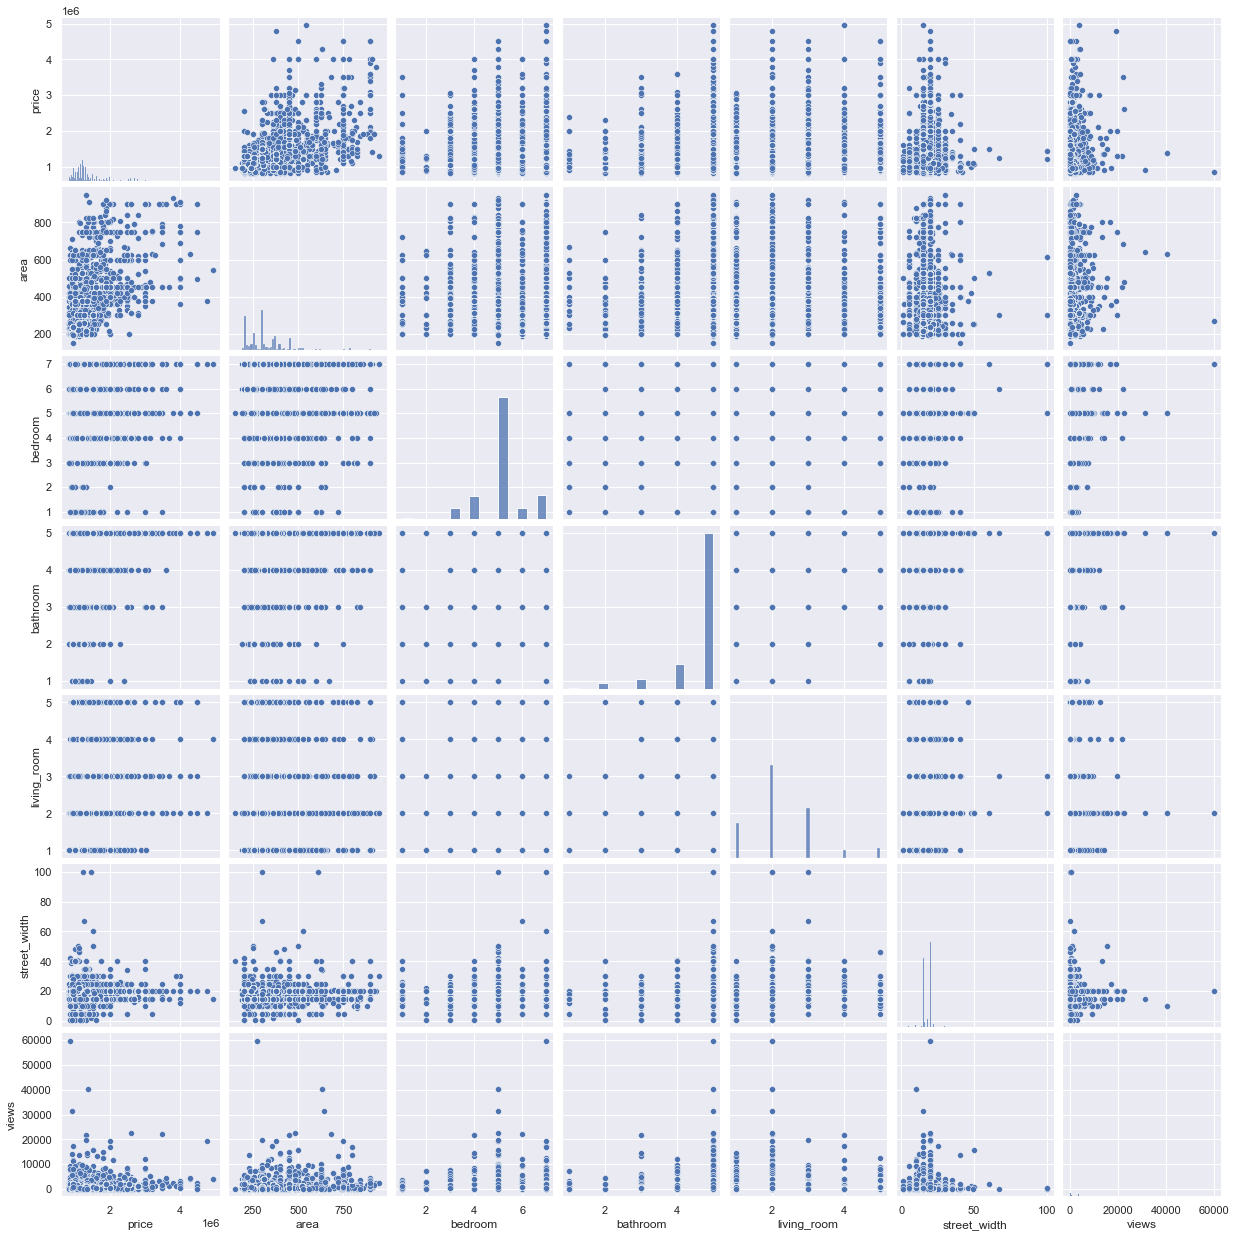

In [29]:
sns.pairplot(df)

In [30]:
# rename the arabic column and dummy column
df= pd.concat([df.drop('direction', axis=1), pd.get_dummies(df['direction'],drop_first=True)], axis=1)
df.rename(columns={'4 شوارع':'four_street','3 شوارع':'three_street','جنوب':'south','جنوب شرقي':'south_east','جنوب غربي':'south_west',
                   'شرق':'east','شمال':'north','شمال شرقي':'north_east','شمال غربي':'north_west','غرب':'west'}, inplace=True)

In [31]:
df.corr()

,price,area,bedroom,bathroom,living_room,street_width,views,south,south_east,south_west,east,north,north_east,north_west,west
price,1.000000,0.549292,0.064726,0.054142,0.150717,0.021532,0.264054,-0.081792,0.273871,0.120355,-0.040999,-0.035320,-0.012160,0.039685,-0.053278
area,0.549292,1.000000,0.001947,0.001182,0.115309,-0.075035,0.235003,-0.067570,0.263142,0.102563,-0.075935,-0.051593,-0.012385,0.055547,-0.004847
bedroom,0.064726,0.001947,1.000000,0.073435,0.075139,0.004941,0.042045,0.058939,0.010088,-0.113676,-0.009659,-0.094291,0.103281,0.020292,0.044359
bathroom,0.054142,0.001182,0.073435,1.000000,0.257566,0.119031,-0.070234,-0.112591,0.070748,0.027057,0.060810,0.059173,-0.160254,-0.008885,0.014573
living_room,0.150717,0.115309,0.075139,0.257566,1.000000,0.070398,0.066908,0.010385,0.257875,-0.078302,0.023155,-0.042801,-0.064942,-0.004556,-0.070208
street_width,0.021532,-0.075035,0.004941,0.119031,0.070398,1.000000,-0.058968,-0.012350,0.042043,0.042243,-0.026778,-0.021155,-0.001723,0.017787,0.019480
views,0.264054,0.235003,0.042045,-0.070234,0.066908,-0.058968,1.000000,0.014061,0.147446,0.010870,-0.008212,-0.033582,-0.020045,0.000728,-0.048738
south,-0.081792,-0.067570,0.058939,-0.112591,0.010385,-0.012350,0.014061,1.000000,-0.114759,-0.082375,-0.268296,-0.300770,-0.101099,-0.063127,-0.210934
south_east,0.273871,0.263142,0.010088,0.070748,0.257875,0.042043,0.147446,-0.114759,1.000000,-0.040006,-0.130300,-0.146071,-0.049099,-0.030658,-0.102441
south_west,0.120355,0.102563,-0.113676,0.027057,-0.078302,0.042243,0.010870,-0.082375,-0.040006,1.000000,-0.093529,-0.104850,-0.035244,-0.022006,-0.073533


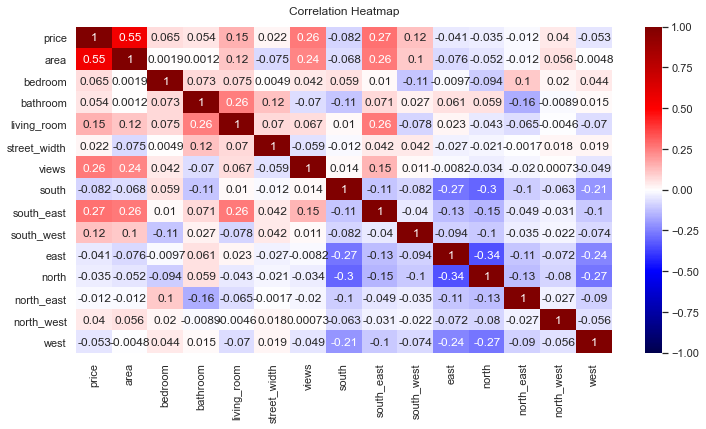

In [32]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [33]:
# create dummy variable 
df= pd.concat([df.drop('bedroom', axis=1), pd.get_dummies(df['bedroom'],drop_first=True)], axis=1)
df= pd.concat([df.drop('bathroom', axis=1), pd.get_dummies(df['bathroom'],drop_first=True)], axis=1)
df= pd.concat([df.drop('living_room', axis=1), pd.get_dummies(df['living_room'],drop_first=True)], axis=1)
df= pd.concat([df.drop('house_age', axis=1), pd.get_dummies(df['house_age'],drop_first=True)], axis=1)

In [34]:
df

,price,area,street_width,views,south,south_east,south_west,east,north,north_east,...,34,35,36,4,5,6,7,8,9,جديد
0,1200000.0,375.0,15.0,157.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1050000.0,360.0,15.0,1420.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500000.0,300.0,15.0,842.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1000000.0,360.0,15.0,291.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1300000.0,200.0,20.0,63.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,2550000.0,200.0,20.0,2167.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
17956,1250000.0,300.0,18.0,102.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17958,1600000.0,450.0,15.0,243.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17959,1350000.0,375.0,20.0,34.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# convert all DataFrame columns to the float dtype
df= df.astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12180 entries, 0 to 17960
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12180 non-null  float64
 1   area          12180 non-null  float64
 2   street_width  12180 non-null  float64
 3   views         12180 non-null  float64
 4   south         12180 non-null  float64
 5   south_east    12180 non-null  float64
 6   south_west    12180 non-null  float64
 7   east          12180 non-null  float64
 8   north         12180 non-null  float64
 9   north_east    12180 non-null  float64
 10  north_west    12180 non-null  float64
 11  west          12180 non-null  float64
 12  2.0           12180 non-null  float64
 13  3.0           12180 non-null  float64
 14  4.0           12180 non-null  float64
 15  5.0           12180 non-null  float64
 16  6.0           12180 non-null  float64
 17  7.0           12180 non-null  float64
 18  2.0           12180 non-nu

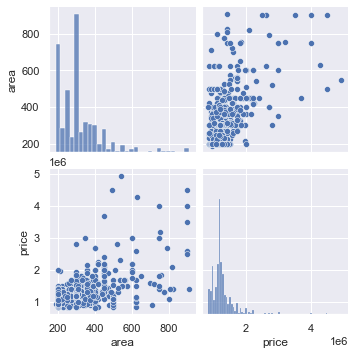

In [37]:
sns.pairplot(df[['area','price']][:1000]);

# Modeling

In [38]:
# create copy dataframe
df2=df.copy()

In [39]:
X,y = df2.iloc[:,1:],df2['price']

In [40]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(df2.iloc[:,1:],df2['price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [41]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5313138760919909

In [42]:
# Score on validation set
lr.score(X_val,y_val)

0.5207487685098364

In [43]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8109672854140456

In [44]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

0.18590931676337175

In [45]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143397261366.65625, tolerance: 118794603723.71039
  model = cd_fast.enet_coordinate_descent_gram(
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124737292697.0, tolerance: 118794603723.71039
  model = cd_fast.enet_coordinate_descent_gram(


0.7516910954039737

In [46]:
# Score on validation set
lasso.score(X_val_poly_scaled, y_val)

0.6561389997983373

In [47]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248034325579.0, tolerance: 157472031394.652
  model = cd_fast.enet_coordinate_descent_gram(
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237835747803.4375, tolerance: 157472031394.652
  model = cd_fast.enet_coordinate_descent_gram(


0.6762174963427567

In [48]:
###################################################################

In [49]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.5313138760919909
Val score 0.5207487685098364


In [51]:
for degree in [1,2]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 0.5313138760919909
Val score 0.5207487685097136
--------------------
Degree 2
Train score 0.8109672854140456
Val score 0.18590931676337175


In [52]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.5313112582939907
Val score 0.5208310093488306


/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246248723242919.38, tolerance: 146988486884.55203
  model = cd_fast.enet_coordinate_descent(


In [53]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.5300939821783128
Val score 0.5222161988392953


In [54]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.9738296650102638
Val score 0.7485094422364996


In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [56]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

rf = RandomForestRegressor()
rf.fit(X_train_val,y_train_val)

print(f'Train score {rf.score(X_train_val, y_train_val)}')
print(f'Test score {rf.score(X_test, y_test)}')

Train score 0.975410638469372
Test score 0.8145246133210123


In [57]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

lr = LinearRegression()
lr.fit(X_train_val,y_train_val)

print(f'Train score {lr.score(X_train_val, y_train_val)}')
print(f'Test score {lr.score(X_test, y_test)}')

Train score 0.5303767436632969
Test score 0.5277930628015182


In [58]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

ridge_model = Ridge()
ridge_model.fit(X_train_val,y_train_val)

print(f'Train score {ridge_model.score(X_train_val, y_train_val)}')
print(f'Test score {ridge_model.score(X_test, y_test)}')

Train score 0.5296931972333025
Test score 0.5268948907481394


In [59]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

lasso_model = Lasso()
lasso_model.fit(X_train_val,y_train_val)

print(f'Train score {lasso_model.score(X_train_val, y_train_val)}')
print(f'Test score {lasso_model.score(X_test, y_test)}')

Train score 0.5303753168713949
Test score 0.5278047613365264


/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310280780485633.4, tolerance: 198023125012.21948
  model = cd_fast.enet_coordinate_descent(


In [60]:
y_train_val_pred = lr.predict(X_train_val)
y_test_pred = lr.predict(X_test)

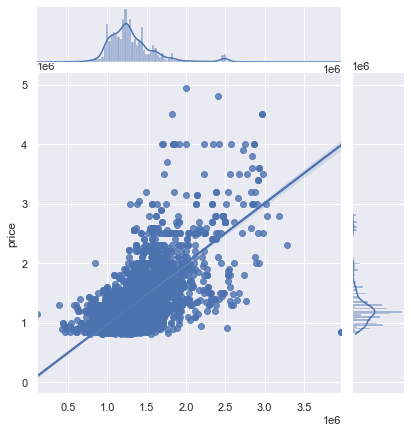

In [61]:
a=LinearRegression()
a.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246248723242919.38, tolerance: 146988486884.55203
  model = cd_fast.enet_coordinate_descent(


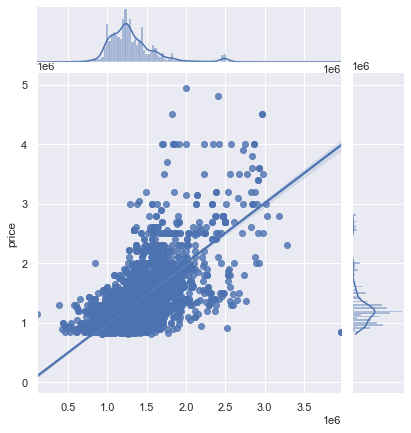

In [62]:
a2=Lasso()
a2.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')

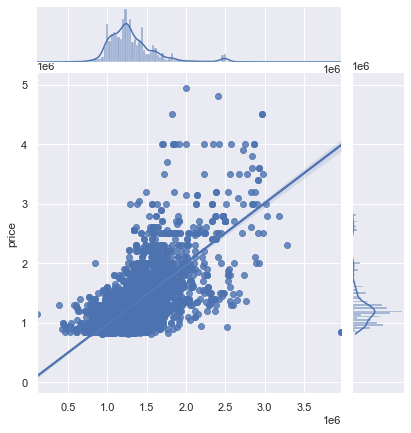

In [63]:
a1=Ridge()
a1.fit(X_train, y_train)
preda=a.predict(X)
sns.jointplot(x=preda, y=y , kind='reg')